# Modelling with PyHealth (using NOTEEVENTS_ICD)

## Libraries

In [1]:
import pandas as pd
import numpy as np

In [ ]:
%pip install torch==2.1.0

In [1]:
import torch
print(torch.__version__)

# Install required packages.
import os
os.environ['TORCH'] = torch.__version__

2.1.0+cpu


In [13]:
%pip install torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
%pip install torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html

Looking in links: https://data.pyg.org/whl/torch-${TORCH}.html
Note: you may need to restart the kernel to use updated packages.
Looking in links: https://data.pyg.org/whl/torch-${TORCH}.html
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install torch-geometric

In [2]:
# carica i dati dai file csv
noteevents = pd.read_csv('data/NOTEEVENTS_ICD.csv')
patients = pd.read_csv('data/PATIENTS.csv')

# seleziona i pazienti presenti in NOTEEVENTS_ICD
selected_patients = patients[patients['SUBJECT_ID'].isin(noteevents['SUBJECT_ID'].unique())]

# salva il risultato in un file csv
selected_patients.to_csv('data/PATIENTS_SEL.csv', index=False)


## Loading MIMIC-III into PyHealth

In [3]:
from pyhealth.datasets import MIMIC3Dataset

dataset = MIMIC3Dataset(
    root='data/',
    tables=["DIAGNOSES_ICD","PROCEDURES_ICD","PRESCRIPTIONS","NOTEEVENTS_ICD"],
    code_mapping={"NDC": ("ATC", {"target_kwargs": {"level": 3}})},
    # refresh_cache=True,
    # dev=True
)

In [4]:
dataset.stat()


Statistics of base dataset (dev=False):
	- Dataset: MIMIC3Dataset
	- Number of patients: 1560
	- Number of visits: 5014
	- Number of visits per patient: 3.2141
	- Number of events per visit in DIAGNOSES_ICD: 11.5987
	- Number of events per visit in PROCEDURES_ICD: 3.8771
	- Number of events per visit in PRESCRIPTIONS: 44.3879
	- Number of events per visit in NOTEEVENTS_ICD: 11.0782



'\nStatistics of base dataset (dev=False):\n\t- Dataset: MIMIC3Dataset\n\t- Number of patients: 1560\n\t- Number of visits: 5014\n\t- Number of visits per patient: 3.2141\n\t- Number of events per visit in DIAGNOSES_ICD: 11.5987\n\t- Number of events per visit in PROCEDURES_ICD: 3.8771\n\t- Number of events per visit in PRESCRIPTIONS: 44.3879\n\t- Number of events per visit in NOTEEVENTS_ICD: 11.0782\n'

## Reading retrieved dataset

In [25]:
# get patient dictionary
patient_dict = dataset.patients
print(list(patient_dict.keys()))
print(len(patient_dict))

['10055', '10071', '10077', '10144', '10160', '10174', '10197', '10207', '10254', '10285', '1029', '10302', '10304', '10310', '10328', '10342', '10369', '10414', '10434', '10442', '10478', '10487', '10488', '1050', '10594', '10612', '10618', '10634', '10635', '10637', '10660', '10679', '10687', '1069', '10742', '10774', '10820', '10832', '10859', '10884', '109', '10906', '10932', '10939', '10973', '10976', '10977', '11043', '11102', '11108', '11135', '11165', '11171', '112', '11205', '1122', '11234', '11236', '11242', '11255', '11318', '11342', '11346', '11421', '11442', '11464', '11479', '11588', '11590', '11604', '11623', '11634', '11716', '11763', '11764', '11778', '11818', '11825', '11830', '11838', '11861', '1187', '11876', '11885', '11892', '11897', '11932', '1197', '11970', '12039', '12076', '12110', '12113', '12125', '12149', '12198', '12203', '12217', '1223', '12281', '12344', '124', '12411', '12446', '12467', '12501', '12515', '12521', '12566', '12567', '12690', '12706', '127

In [26]:
# get the "10" patient
patient = patient_dict["4096"]
patient.gender, patient.birth_datetime, patient.ethnicity, patient.death_datetime, patient.visits
print(patient.visits)

OrderedDict([('124383', Visit 124383 from patient 4096 with 86 events from tables ['DIAGNOSES_ICD', 'PROCEDURES_ICD', 'PRESCRIPTIONS', 'NOTEEVENTS_ICD']), ('161677', Visit 161677 from patient 4096 with 109 events from tables ['DIAGNOSES_ICD', 'PROCEDURES_ICD', 'PRESCRIPTIONS', 'NOTEEVENTS_ICD'])])


In [27]:
# get the visit list of this patient
visit_dict = patient.visits
print (list(visit_dict.keys()))

['124383', '161677']


In [28]:
# get the first visit
visit = visit_dict['124383']
visit.encounter_time, visit.available_tables, visit.num_events, visit.event_list_dict

(datetime.datetime(2170, 7, 20, 18, 9),
 ['DIAGNOSES_ICD', 'PROCEDURES_ICD', 'PRESCRIPTIONS', 'NOTEEVENTS_ICD'],
 86,
 {'DIAGNOSES_ICD': [Event with ICD9CM code 0389 from table DIAGNOSES_ICD,
   Event with ICD9CM code 5849 from table DIAGNOSES_ICD,
   Event with ICD9CM code 496 from table DIAGNOSES_ICD,
   Event with ICD9CM code 4280 from table DIAGNOSES_ICD,
   Event with ICD9CM code 42731 from table DIAGNOSES_ICD,
   Event with ICD9CM code 566 from table DIAGNOSES_ICD,
   Event with ICD9CM code 99592 from table DIAGNOSES_ICD,
   Event with ICD9CM code 4589 from table DIAGNOSES_ICD,
   Event with ICD9CM code 25080 from table DIAGNOSES_ICD,
   Event with ICD9CM code 4019 from table DIAGNOSES_ICD,
   Event with ICD9CM code 2859 from table DIAGNOSES_ICD,
   Event with ICD9CM code 78009 from table DIAGNOSES_ICD,
   Event with ICD9CM code 4439 from table DIAGNOSES_ICD,
   Event with ICD9CM code 5939 from table DIAGNOSES_ICD,
   Event with ICD9CM code 71590 from table DIAGNOSES_ICD,
   Even

In [29]:
visit.get_code_list(table='NOTEEVENTS_ICD')

['V419',
 '4019',
 '4439',
 '43491',
 '78060',
 '51189',
 '7840',
 '78650',
 '78609',
 '78605',
 '78096',
 '2724',
 '53081',
 '71590',
 '5770',
 '496',
 '27800',
 '7823',
 '42761',
 '2512',
 '5849',
 '78791',
 '3301']

## Modelling data for task of Drug Recommendation

In [5]:
from pyhealth.tasks import drug_recommendation_mimic3_fn
from pyhealth.datasets import split_by_patient, get_dataloader

mimic3sample = dataset.set_task(task_fn=drug_recommendation_mimic3_fn) # use default task
train_ds, val_ds, test_ds = split_by_patient(mimic3sample, [0.8, 0.1, 0.1])


Generating samples for drug_recommendation_mimic3_fn: 100%|██████████| 1560/1560 [00:00<00:00, 12557.72it/s]


In [6]:
mimic3sample.stat()

Statistics of sample dataset:
	- Dataset: MIMIC3Dataset
	- Task: drug_recommendation_mimic3_fn
	- Number of samples: 2012
	- Number of patients: 906
	- Number of visits: 2012
	- Number of visits per patient: 2.2208
	- conditions:
		- Number of conditions per sample: 18.8827
		- Number of unique conditions: 2099
		- Distribution of conditions (Top-10): [('4019', 1225), ('4280', 1021), ('42731', 783), ('41401', 767), ('5849', 594), ('25000', 537), ('53081', 458), ('5990', 393), ('40391', 389), ('2724', 386)]
	- procedures:
		- Number of procedures per sample: 7.0055
		- Number of unique procedures: 731
		- Distribution of procedures (Top-10): [('3893', 1047), ('9904', 776), ('9604', 529), ('3995', 505), ('966', 484), ('9671', 477), ('3891', 295), ('9672', 292), ('3961', 267), ('9915', 257)]
	- drugs:
		- Number of drugs per sample: 24.4841
		- Number of unique drugs: 178
		- Distribution of drugs (Top-10): [('A02B', 1797), ('B05X', 1792), ('B01A', 1686), ('N02B', 1681), ('A06A', 1564), (

"Statistics of sample dataset:\n\t- Dataset: MIMIC3Dataset\n\t- Task: drug_recommendation_mimic3_fn\n\t- Number of samples: 2012\n\t- Number of patients: 906\n\t- Number of visits: 2012\n\t- Number of visits per patient: 2.2208\n\t- conditions:\n\t\t- Number of conditions per sample: 18.8827\n\t\t- Number of unique conditions: 2099\n\t\t- Distribution of conditions (Top-10): [('4019', 1225), ('4280', 1021), ('42731', 783), ('41401', 767), ('5849', 594), ('25000', 537), ('53081', 458), ('5990', 393), ('40391', 389), ('2724', 386)]\n\t- procedures:\n\t\t- Number of procedures per sample: 7.0055\n\t\t- Number of unique procedures: 731\n\t\t- Distribution of procedures (Top-10): [('3893', 1047), ('9904', 776), ('9604', 529), ('3995', 505), ('966', 484), ('9671', 477), ('3891', 295), ('9672', 292), ('3961', 267), ('9915', 257)]\n\t- drugs:\n\t\t- Number of drugs per sample: 24.4841\n\t\t- Number of unique drugs: 178\n\t\t- Distribution of drugs (Top-10): [('A02B', 1797), ('B05X', 1792), ('B

In [7]:
# create dataloaders (torch.data.DataLoader)
train_loader = get_dataloader(train_ds, batch_size=128, shuffle=True)
val_loader = get_dataloader(val_ds, batch_size=128, shuffle=False)
test_loader = get_dataloader(test_ds, batch_size=128, shuffle=False)

In [8]:
len(train_ds), len(val_ds), len(test_ds)

(1593, 202, 217)

## Our Model

In [81]:
%load_ext autoreload
%autoreload 2

import importlib
import pyhealth.models

importlib.reload(pyhealth.models)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<module 'pyhealth.models' from 'C:\\Users\\AR\\Desktop\\Tirocinio_Tesi\\src\\pyhealth\\pyhealth\\models\\__init__.py'>

In [82]:
from pyhealth.models import GNN

model = GNN(
    dataset=mimic3sample
)

GNN(
  (layer): GNNLayer(
    (pat_emb): Embedding(906, 128)
    (symp_emb): Embedding(714, 128)
    (proc_emb): Embedding(731, 128)
    (dis_emb): Embedding(2099, 128)
    (drug_emb): Embedding(178, 128)
    (gnn): GraphModule(
      (conv1): ModuleDict(
        (patient__presents__symptom): SAGEConv(128, 128, aggr=mean)
        (patient__has__disease): SAGEConv(128, 128, aggr=mean)
        (patient__has_treat__procedure): SAGEConv(128, 128, aggr=mean)
        (patient__has_received__drug): SAGEConv(128, 128, aggr=mean)
        (symptom__rev_presents__patient): SAGEConv(128, 128, aggr=mean)
        (disease__rev_has__patient): SAGEConv(128, 128, aggr=mean)
        (procedure__rev_has_treat__patient): SAGEConv(128, 128, aggr=mean)
        (drug__rev_has_received__patient): SAGEConv(128, 128, aggr=mean)
      )
      (dropout): ModuleDict(
        (patient): Dropout(p=0.5, inplace=False)
        (symptom): Dropout(p=0.5, inplace=False)
        (disease): Dropout(p=0.5, inplace=False)
  

Epoch 0 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-0, step-13 ---
loss: 4.5015


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 16.05it/s]

--- Eval epoch-0, step-13 ---
pr_auc_samples: 0.5045
loss: 1.1969
New best pr_auc_samples score (0.5045) at epoch-0, step-13



Epoch 1 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-1, step-26 ---
loss: 4.1018


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 15.57it/s]

--- Eval epoch-1, step-26 ---
pr_auc_samples: 0.5227
loss: 1.0538
New best pr_auc_samples score (0.5227) at epoch-1, step-26



Epoch 2 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-2, step-39 ---
loss: 3.8271


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 15.31it/s]

--- Eval epoch-2, step-39 ---
pr_auc_samples: 0.5382
loss: 0.9571
New best pr_auc_samples score (0.5382) at epoch-2, step-39



Epoch 3 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-3, step-52 ---
loss: 3.4774


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 13.15it/s]

--- Eval epoch-3, step-52 ---
pr_auc_samples: 0.5524
loss: 0.8838
New best pr_auc_samples score (0.5524) at epoch-3, step-52



Epoch 4 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-4, step-65 ---
loss: 3.3004


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 16.72it/s]

--- Eval epoch-4, step-65 ---
pr_auc_samples: 0.5678
loss: 0.8211
New best pr_auc_samples score (0.5678) at epoch-4, step-65



Epoch 5 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-5, step-78 ---
loss: 3.0960


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 17.55it/s]

--- Eval epoch-5, step-78 ---
pr_auc_samples: 0.5895
loss: 0.7688
New best pr_auc_samples score (0.5895) at epoch-5, step-78



Epoch 6 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-6, step-91 ---
loss: 2.8544


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 17.42it/s]

--- Eval epoch-6, step-91 ---
pr_auc_samples: 0.6106
loss: 0.7269
New best pr_auc_samples score (0.6106) at epoch-6, step-91



Epoch 7 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-7, step-104 ---
loss: 2.6709


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 15.55it/s]

--- Eval epoch-7, step-104 ---
pr_auc_samples: 0.6313
loss: 0.6944
New best pr_auc_samples score (0.6313) at epoch-7, step-104



Epoch 8 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-8, step-117 ---
loss: 2.5899


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 15.69it/s]

--- Eval epoch-8, step-117 ---
pr_auc_samples: 0.6473
loss: 0.6684
New best pr_auc_samples score (0.6473) at epoch-8, step-117



Epoch 9 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-9, step-130 ---
loss: 2.4158


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 11.41it/s]

--- Eval epoch-9, step-130 ---
pr_auc_samples: 0.6652
loss: 0.6460
New best pr_auc_samples score (0.6652) at epoch-9, step-130



Epoch 10 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-10, step-143 ---
loss: 2.2912


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 11.07it/s]

--- Eval epoch-10, step-143 ---
pr_auc_samples: 0.6882
loss: 0.6239
New best pr_auc_samples score (0.6882) at epoch-10, step-143



Epoch 11 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-11, step-156 ---
loss: 2.1914


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 15.22it/s]

--- Eval epoch-11, step-156 ---
pr_auc_samples: 0.6976
loss: 0.6156
New best pr_auc_samples score (0.6976) at epoch-11, step-156



Epoch 12 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-12, step-169 ---
loss: 2.0955


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 17.02it/s]

--- Eval epoch-12, step-169 ---
pr_auc_samples: 0.7083
loss: 0.6084
New best pr_auc_samples score (0.7083) at epoch-12, step-169



Epoch 13 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-13, step-182 ---
loss: 1.9760


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 15.56it/s]

--- Eval epoch-13, step-182 ---
pr_auc_samples: 0.7131
loss: 0.6040
New best pr_auc_samples score (0.7131) at epoch-13, step-182



Epoch 14 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-14, step-195 ---
loss: 1.8855


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 15.29it/s]

--- Eval epoch-14, step-195 ---
pr_auc_samples: 0.7275
loss: 0.5933
New best pr_auc_samples score (0.7275) at epoch-14, step-195



Epoch 15 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-15, step-208 ---
loss: 1.8211


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 17.22it/s]

--- Eval epoch-15, step-208 ---
pr_auc_samples: 0.7356
loss: 0.5856
New best pr_auc_samples score (0.7356) at epoch-15, step-208



Epoch 16 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-16, step-221 ---
loss: 1.7727


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 16.82it/s]

--- Eval epoch-16, step-221 ---
pr_auc_samples: 0.7455
loss: 0.5747
New best pr_auc_samples score (0.7455) at epoch-16, step-221



Epoch 17 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-17, step-234 ---
loss: 1.6877


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 16.03it/s]

--- Eval epoch-17, step-234 ---
pr_auc_samples: 0.7565
loss: 0.5640
New best pr_auc_samples score (0.7565) at epoch-17, step-234



Epoch 18 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-18, step-247 ---
loss: 1.6216


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 15.76it/s]

--- Eval epoch-18, step-247 ---
pr_auc_samples: 0.7582
loss: 0.5632
New best pr_auc_samples score (0.7582) at epoch-18, step-247



Epoch 19 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-19, step-260 ---
loss: 1.5240


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 15.35it/s]

--- Eval epoch-19, step-260 ---
pr_auc_samples: 0.7734
loss: 0.5551
New best pr_auc_samples score (0.7734) at epoch-19, step-260



Epoch 20 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-20, step-273 ---
loss: 1.5073


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 15.33it/s]

--- Eval epoch-20, step-273 ---
pr_auc_samples: 0.7771
loss: 0.5526
New best pr_auc_samples score (0.7771) at epoch-20, step-273



Epoch 21 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-21, step-286 ---
loss: 1.4499


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 16.91it/s]

--- Eval epoch-21, step-286 ---
pr_auc_samples: 0.7777
loss: 0.5503
New best pr_auc_samples score (0.7777) at epoch-21, step-286



Epoch 22 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-22, step-299 ---
loss: 1.3753


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 15.29it/s]

--- Eval epoch-22, step-299 ---
pr_auc_samples: 0.7801
loss: 0.5455
New best pr_auc_samples score (0.7801) at epoch-22, step-299



Epoch 23 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-23, step-312 ---
loss: 1.3547


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 16.38it/s]

--- Eval epoch-23, step-312 ---
pr_auc_samples: 0.7813
loss: 0.5415
New best pr_auc_samples score (0.7813) at epoch-23, step-312



Epoch 24 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-24, step-325 ---
loss: 1.2920


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 16.00it/s]

--- Eval epoch-24, step-325 ---
pr_auc_samples: 0.7800
loss: 0.5422



Epoch 25 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-25, step-338 ---
loss: 1.2828


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 15.25it/s]

--- Eval epoch-25, step-338 ---
pr_auc_samples: 0.7859
loss: 0.5417
New best pr_auc_samples score (0.7859) at epoch-25, step-338



Epoch 26 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-26, step-351 ---
loss: 1.2453


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 13.00it/s]

--- Eval epoch-26, step-351 ---
pr_auc_samples: 0.7980
loss: 0.5348
New best pr_auc_samples score (0.7980) at epoch-26, step-351



Epoch 27 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-27, step-364 ---
loss: 1.1961


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 18.23it/s]

--- Eval epoch-27, step-364 ---
pr_auc_samples: 0.8008
loss: 0.5341
New best pr_auc_samples score (0.8008) at epoch-27, step-364



Epoch 28 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-28, step-377 ---
loss: 1.1670


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 15.68it/s]

--- Eval epoch-28, step-377 ---
pr_auc_samples: 0.8039
loss: 0.5278
New best pr_auc_samples score (0.8039) at epoch-28, step-377



Epoch 29 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-29, step-390 ---
loss: 1.1548


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 15.52it/s]

--- Eval epoch-29, step-390 ---
pr_auc_samples: 0.8028
loss: 0.5269



Epoch 30 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-30, step-403 ---
loss: 1.1145


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 15.51it/s]

--- Eval epoch-30, step-403 ---
pr_auc_samples: 0.8062
loss: 0.5223
New best pr_auc_samples score (0.8062) at epoch-30, step-403



Epoch 31 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-31, step-416 ---
loss: 1.1121


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 16.48it/s]

--- Eval epoch-31, step-416 ---
pr_auc_samples: 0.8088
loss: 0.5195
New best pr_auc_samples score (0.8088) at epoch-31, step-416



Epoch 32 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-32, step-429 ---
loss: 1.0602


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 14.91it/s]

--- Eval epoch-32, step-429 ---
pr_auc_samples: 0.8141
loss: 0.5143
New best pr_auc_samples score (0.8141) at epoch-32, step-429



Epoch 33 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-33, step-442 ---
loss: 1.0226


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 16.42it/s]

--- Eval epoch-33, step-442 ---
pr_auc_samples: 0.8062
loss: 0.5188



Epoch 34 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-34, step-455 ---
loss: 1.0211


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 14.86it/s]

--- Eval epoch-34, step-455 ---
pr_auc_samples: 0.8141
loss: 0.5118



Epoch 35 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-35, step-468 ---
loss: 0.9864


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 15.55it/s]

--- Eval epoch-35, step-468 ---
pr_auc_samples: 0.8118
loss: 0.5075



Epoch 36 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-36, step-481 ---
loss: 0.9893


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 12.72it/s]

--- Eval epoch-36, step-481 ---
pr_auc_samples: 0.8206
loss: 0.5004
New best pr_auc_samples score (0.8206) at epoch-36, step-481



Epoch 37 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-37, step-494 ---
loss: 0.9504


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 16.80it/s]

--- Eval epoch-37, step-494 ---
pr_auc_samples: 0.8107
loss: 0.5034



Epoch 38 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-38, step-507 ---
loss: 0.9379


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 15.04it/s]

--- Eval epoch-38, step-507 ---
pr_auc_samples: 0.8152
loss: 0.5026



Epoch 39 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-39, step-520 ---
loss: 0.9427


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 14.86it/s]

--- Eval epoch-39, step-520 ---
pr_auc_samples: 0.8253
loss: 0.5022
New best pr_auc_samples score (0.8253) at epoch-39, step-520



Epoch 40 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-40, step-533 ---
loss: 0.9157


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 16.03it/s]

--- Eval epoch-40, step-533 ---
pr_auc_samples: 0.8186
loss: 0.5077



Epoch 41 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-41, step-546 ---
loss: 0.9049


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 15.67it/s]

--- Eval epoch-41, step-546 ---
pr_auc_samples: 0.8193
loss: 0.5053



Epoch 42 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-42, step-559 ---
loss: 0.8544


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 15.13it/s]

--- Eval epoch-42, step-559 ---
pr_auc_samples: 0.8241
loss: 0.5048



Epoch 43 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-43, step-572 ---
loss: 0.8553


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 14.73it/s]

--- Eval epoch-43, step-572 ---
pr_auc_samples: 0.8247
loss: 0.5042



Epoch 44 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-44, step-585 ---
loss: 0.8482


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 16.04it/s]

--- Eval epoch-44, step-585 ---
pr_auc_samples: 0.8388
loss: 0.4970
New best pr_auc_samples score (0.8388) at epoch-44, step-585



Epoch 45 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-45, step-598 ---
loss: 0.8359


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 16.93it/s]

--- Eval epoch-45, step-598 ---
pr_auc_samples: 0.8281
loss: 0.4982



Epoch 46 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-46, step-611 ---
loss: 0.8286


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 14.17it/s]

--- Eval epoch-46, step-611 ---
pr_auc_samples: 0.8352
loss: 0.4883



Epoch 47 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-47, step-624 ---
loss: 0.8022


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 15.85it/s]

--- Eval epoch-47, step-624 ---
pr_auc_samples: 0.8354
loss: 0.4869



Epoch 48 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-48, step-637 ---
loss: 0.7935


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 14.84it/s]

--- Eval epoch-48, step-637 ---
pr_auc_samples: 0.8425
loss: 0.4837
New best pr_auc_samples score (0.8425) at epoch-48, step-637



Epoch 49 / 50:   0%|          | 0/13 [00:00<?, ?it/s]

--- Train epoch-49, step-650 ---
loss: 0.7916


Evaluation: 100%|██████████| 2/2 [00:00<00:00, 16.21it/s]

--- Eval epoch-49, step-650 ---
pr_auc_samples: 0.8382
loss: 0.4894
Loaded best model


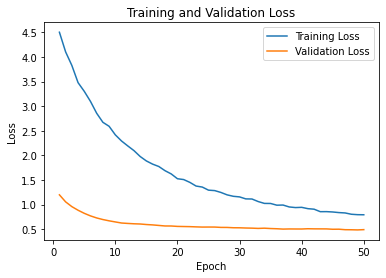

Evaluation: 100%|██████████| 2/2 [00:00<00:00, 11.07it/s]

--- Test ---


pr_auc_samples: 0.8618
loss: 0.4591


In [83]:
from pyhealth.trainer import Trainer

trainer = Trainer(model=model)
trainer.train(
    model_name="gnn",
    train_dataloader=train_loader,
    val_dataloader=val_loader,
    test_dataloader=test_loader,
    epochs=50,
    optimizer_params = {"lr": 2 * 1e-4},
    monitor="pr_auc_samples",
    monitor_criterion="max",
)

In [84]:
tot = 0
for i in range(0, len(test_ds)):
    tot = tot + len(test_ds[i]["drugs"])

tot
#4891 dovrebbero essere

5633

In [85]:
from pyhealth.metrics import binary_metrics_fn

y_true, y_prob, loss = trainer.inference(test_loader)
print(loss)

Evaluation: 100%|██████████| 2/2 [00:00<00:00, 13.66it/s]

0.45830751955509186


In [86]:
print(y_prob)
print(y_prob.shape)
print(y_prob.max())
print(y_prob.min())

[0.626046   0.796329   0.448914   ... 0.18634897 0.10752654 0.12738775]
(11266,)
0.9919487
0.0005565783


In [87]:
print(y_true)
print(y_true.shape)

print(y_true[y_true == 0].shape)
print(y_true[y_true == 1].shape)



[1. 1. 1. ... 0. 0. 0.]
(11266,)
(5633,)
(5633,)


In [90]:
# best risultati
# Relu with 256 hidden units -> circa 0.74 Acc - 0.70 F1 - 0.64 PRAUC (threshold 0.2-0.4)
# Relu with 512 hidden units -> circa 0.76 Acc - 0.72 F1 - 0.63 PRAUC (threshold 0.2-0.4)
# relu with 128 hidden units -> circa 0.76 Acc - 0.64 F1 - 0.63 PRAUC (threshold 0.4-0.5) - batch size 64


metrics = ["accuracy", "f1", "pr_auc", "jaccard", "precision", "recall"]
binary_metrics_fn(y_true, y_prob, metrics=metrics, threshold=0.3)

{'accuracy': 0.7801349192259897,
 'f1': 0.8006438631790745,
 'pr_auc': 0.8610040147228184,
 'jaccard': 0.6675614011542075,
 'precision': 0.7323321554770318,
 'recall': 0.8830108290431387}

## Baseline Models

Here we can use the models having the same input built in the previous cells. We tried GRASP, SafeDrug, Transformer, and so on. And evaluate them performance with several metrics.

### Transformer

**- Transformer without symptoms**

In [5]:
from pyhealth.models import Transformer

model = Transformer(
    dataset=mimic3sample,
    feature_keys=["conditions", "procedures"],
    label_key="drugs",
    mode="multilabel",
)

**- Transformer with symptoms**

In [14]:
from pyhealth.models import Transformer

model_symptoms = Transformer(
    dataset=mimic3sample,
    feature_keys=["conditions", "procedures", "symptoms"],
    label_key="drugs",
    mode="multilabel",
)

**- Training without symptoms**

In [6]:
from pyhealth.trainer import Trainer

trainer = Trainer(model=model)
trainer.train(
    model_name="transformer",
    train_dataloader=train_loader,
    val_dataloader=val_loader,
    epochs=5,
    optimizer_params = {"lr": 2 * 1e-4},
    monitor="pr_auc_samples",
)

Transformer(
  (embeddings): ModuleDict(
    (conditions): Embedding(2101, 128, padding_idx=0)
    (procedures): Embedding(735, 128, padding_idx=0)
  )
  (linear_layers): ModuleDict()
  (transformer): ModuleDict(
    (conditions): TransformerLayer(
      (transformer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadedAttention(
            (linear_layers): ModuleList(
              (0-2): 3 x Linear(in_features=128, out_features=128, bias=False)
            )
            (output_linear): Linear(in_features=128, out_features=128, bias=False)
            (attention): Attention()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (feed_forward): PositionwiseFeedForward(
            (w_1): Linear(in_features=128, out_features=512, bias=True)
            (w_2): Linear(in_features=512, out_features=128, bias=True)
            (dropout): Dropout(p=0.5, inplace=False)
            (activation): GELU(approximate='none')
          )
          (i

Epoch 0 / 5:   0%|          | 0/38 [00:00<?, ?it/s]

--- Train epoch-0, step-38 ---
loss: 1.0009


Evaluation: 100%|██████████| 13/13 [00:00<00:00, 64.71it/s]


--- Eval epoch-0, step-38 ---
pr_auc_samples: 0.2503
loss: 0.6405
New best pr_auc_samples score (0.2503) at epoch-0, step-38



Epoch 1 / 5:   0%|          | 0/38 [00:00<?, ?it/s]

--- Train epoch-1, step-76 ---
loss: 0.6743


Evaluation: 100%|██████████| 13/13 [00:00<00:00, 96.61it/s]


--- Eval epoch-1, step-76 ---
pr_auc_samples: 0.4571
loss: 0.4041
New best pr_auc_samples score (0.4571) at epoch-1, step-76



Epoch 2 / 5:   0%|          | 0/38 [00:00<?, ?it/s]

--- Train epoch-2, step-114 ---
loss: 0.4855


Evaluation: 100%|██████████| 13/13 [00:00<00:00, 109.89it/s]


--- Eval epoch-2, step-114 ---
pr_auc_samples: 0.5531
loss: 0.3572
New best pr_auc_samples score (0.5531) at epoch-2, step-114



Epoch 3 / 5:   0%|          | 0/38 [00:00<?, ?it/s]

--- Train epoch-3, step-152 ---
loss: 0.4314


Evaluation: 100%|██████████| 13/13 [00:00<00:00, 95.69it/s]


--- Eval epoch-3, step-152 ---
pr_auc_samples: 0.5662
loss: 0.3405
New best pr_auc_samples score (0.5662) at epoch-3, step-152



Epoch 4 / 5:   0%|          | 0/38 [00:00<?, ?it/s]

--- Train epoch-4, step-190 ---
loss: 0.4042


Evaluation: 100%|██████████| 13/13 [00:00<00:00, 105.36it/s]


--- Eval epoch-4, step-190 ---
pr_auc_samples: 0.5733
loss: 0.3298
New best pr_auc_samples score (0.5733) at epoch-4, step-190
Loaded best model


**- Training with symptoms**

In [ ]:
from pyhealth.trainer import Trainer

trainer_symptoms = Trainer(model=model_symptoms)
trainer_symptoms.train(
    model_name="transformer",
    train_dataloader=train_loader,
    val_dataloader=val_loader,
    epochs=5,
    optimizer_params = {"lr": 2 * 1e-4},
    monitor="pr_auc_samples",
)

**- Transformer Evaluation**

In [ ]:
### Without Symptoms - loss 0.3239 - time: 0m 6s
from pyhealth.metrics import multilabel_metrics_fn

y_true, y_prob, loss = trainer.inference(test_loader)
metrics = ["accuracy", "f1_samples", "pr_auc_samples", "jaccard_samples"]
multilabel_metrics_fn(y_true, y_prob, metrics=metrics)

In [8]:
y_true.shape

(405, 178)

In [16]:
### With Symptoms - loss 0.3192 - time: 0m 9s
from pyhealth.metrics import multilabel_metrics_fn

y_true, y_prob, loss = trainer_symptoms.inference(test_loader)
metrics = ["accuracy", "f1_samples", "pr_auc_samples", "jaccard_samples"]
multilabel_metrics_fn(y_true, y_prob, metrics=metrics)

Evaluation: 100%|██████████| 13/13 [00:00<00:00, 99.65it/s]


{'accuracy': 0.8900255754475703,
 'f1_samples': 0.5218895587506972,
 'pr_auc_samples': 0.6142927508787751,
 'jaccard_samples': 0.36047014930167576}

### SafeDrug

**- SafeDrug without symptoms**

In [9]:
from pyhealth.models import SafeDrug

model = SafeDrug(
    dataset=mimic3sample
)

**- SafeDrug with symptoms**

In [23]:
from pyhealth.models import SafeDrug_Mod

model_symptoms = SafeDrug_Mod(
    dataset=mimic3sample
)

**- Training without symptoms**

In [10]:
from pyhealth.trainer import Trainer

trainer = Trainer(model=model)
trainer.train(
    model_name="safedrug",
    train_dataloader=train_loader,
    val_dataloader=val_loader,
    epochs=5,
    optimizer_params = {"lr": 2 * 1e-4},
    monitor="pr_auc_samples",
)

SafeDrug(
  (embeddings): ModuleDict(
    (conditions): Embedding(2101, 128, padding_idx=0)
    (procedures): Embedding(735, 128, padding_idx=0)
  )
  (cond_rnn): GRU(128, 128, batch_first=True)
  (proc_rnn): GRU(128, 128, batch_first=True)
  (query): Sequential(
    (0): ReLU()
    (1): Linear(in_features=256, out_features=128, bias=True)
  )
  (safedrug): SafeDrugLayer(
    (bipartite_transform): Linear(in_features=128, out_features=315, bias=True)
    (bipartite_output): Linear(in_features=315, out_features=178, bias=True)
    (mpnn): MolecularGraphNeuralNetwork(
      (embed_fingerprint): Embedding(226, 128)
      (W_fingerprint): ModuleList(
        (0-1): 2 x Linear(in_features=128, out_features=128, bias=True)
      )
    )
    (mpnn_output): Linear(in_features=178, out_features=178, bias=True)
    (mpnn_layernorm): LayerNorm((178,), eps=1e-05, elementwise_affine=True)
    (test): Linear(in_features=128, out_features=178, bias=True)
    (loss_fn): BCEWithLogitsLoss()
  )
)
Metri

Epoch 0 / 5:   0%|          | 0/38 [00:00<?, ?it/s]

--- Train epoch-0, step-38 ---
loss: 0.5502
ddi_loss: 0.1019


Evaluation: 100%|██████████| 13/13 [00:03<00:00,  3.32it/s]

--- Eval epoch-0, step-38 ---
pr_auc_samples: 0.4981
loss: 0.4226
New best pr_auc_samples score (0.4981) at epoch-0, step-38


Epoch 1 / 5:   0%|          | 0/38 [00:00<?, ?it/s]

--- Train epoch-1, step-76 ---
loss: 0.3415
ddi_loss: 0.0516


Evaluation: 100%|██████████| 13/13 [00:03<00:00,  3.48it/s]

--- Eval epoch-1, step-76 ---
pr_auc_samples: 0.6138
loss: 0.3050
New best pr_auc_samples score (0.6138) at epoch-1, step-76


Epoch 2 / 5:   0%|          | 0/38 [00:00<?, ?it/s]

--- Train epoch-2, step-114 ---
loss: 0.2843
ddi_loss: 0.0429


Evaluation: 100%|██████████| 13/13 [00:04<00:00,  3.24it/s]

--- Eval epoch-2, step-114 ---
pr_auc_samples: 0.6275
loss: 0.2770
New best pr_auc_samples score (0.6275) at epoch-2, step-114


Epoch 3 / 5:   0%|          | 0/38 [00:00<?, ?it/s]

--- Train epoch-3, step-152 ---
loss: 0.2694
ddi_loss: 0.0339


Evaluation: 100%|██████████| 13/13 [00:03<00:00,  3.77it/s]

--- Eval epoch-3, step-152 ---
pr_auc_samples: 0.6311
loss: 0.2726
New best pr_auc_samples score (0.6311) at epoch-3, step-152


Epoch 4 / 5:   0%|          | 0/38 [00:00<?, ?it/s]

--- Train epoch-4, step-190 ---
loss: 0.2607
ddi_loss: 0.0356


Evaluation: 100%|██████████| 13/13 [00:03<00:00,  3.87it/s]

--- Eval epoch-4, step-190 ---
pr_auc_samples: 0.6315
loss: 0.2722
New best pr_auc_samples score (0.6315) at epoch-4, step-190


Loaded best model


**- Training with symptoms**

In [ ]:
from pyhealth.trainer import Trainer

trainer_symptoms = Trainer(model=model_symptoms)
trainer_symptoms.train(
    model_name="safedrug",
    train_dataloader=train_loader,
    val_dataloader=val_loader,
    epochs=5,
    optimizer_params = {"lr": 2 * 1e-4},
    monitor="pr_auc_samples",
)

**- SafeDrug Evaluation**

In [11]:
### Without Symptoms - loss 0.2672 - time: 2m 6s
from pyhealth.metrics import multilabel_metrics_fn

y_true, y_prob, loss = trainer.inference(test_loader)
metrics = ["accuracy", "f1_samples", "pr_auc_samples", "jaccard_samples"]
multilabel_metrics_fn(y_true, y_prob, metrics=metrics)

Evaluation: 100%|██████████| 13/13 [00:03<00:00,  3.79it/s]


{'accuracy': 0.893424885559717,
 'f1_samples': 0.48484571222068096,
 'pr_auc_samples': 0.6387088524041594,
 'jaccard_samples': 0.32679935189451037}

In [12]:
y_true.shape

(405, 178)

In [25]:
### With Symptoms - loss 0.2666 - time: 2m 0s
from pyhealth.metrics import multilabel_metrics_fn

y_true, y_prob, loss = trainer_symptoms.inference(test_loader)
metrics = ["accuracy", "f1_samples", "pr_auc_samples", "jaccard_samples"]
multilabel_metrics_fn(y_true, y_prob, metrics=metrics)

Evaluation: 100%|██████████| 13/13 [00:03<00:00,  4.25it/s]


{'accuracy': 0.8965487514009023,
 'f1_samples': 0.4940201459077551,
 'pr_auc_samples': 0.6575319724664682,
 'jaccard_samples': 0.3343368918438221}

### GAMENet

### GRASP

### RETAIN

### GRAM

### KAME

### MoleRec

## Let'see some recommendation...

In [26]:
y_prob_round = np.round(y_prob, 0)

# Find the indices of the columns with values equal to 1 for each row
column_indices = [np.where(row == 1)[0] for row in y_prob_round]

indexes_prob=[]
# Print the column indices for each row
for i, indices in enumerate(column_indices):
    indexes_prob.append(indices)

In [27]:
# create empty lists to store the recommended drugs, patient ids, and visit ids
rec_drug = []
patient_ids = []
visit_ids = []

# get the list of all drugs in the dataset
list_drugs = mimic3sample.get_all_tokens('drugs')

# iterate over the top indexes for each sample in test_ds
for sample, top in zip(test_ds, indexes_prob):
    
    # append the patient id and visit id to their respective lists
    patient_ids.append(sample['patient_id'])
    visit_ids.append(sample['visit_id'])
    
    # create an empty list to store the recommended drugs for this sample
    sample_rec_drug = []
    
    # iterate over the top indexes for this sample
    for i in top:
        
        # append the drug at the i-th index to the recommended drugs list for this sample
        sample_rec_drug.append(list_drugs[i])
    
    # append the recommended drugs for this sample to the recommended drugs list
    rec_drug.append(sample_rec_drug)

# create a dataframe with the patient ids, visit ids, and recommended drugs
df_rec_drug = pd.DataFrame({'patient_id': patient_ids, 'visit_id': visit_ids, 'rec_drug': rec_drug})
df_rec_drug.to_csv('data/rec_drug.csv', index=False)

In [28]:
# Find the indices of the columns with values equal to 1 for each row
column_indices = [np.where(row == 1)[0] for row in y_true]

indexes=[]
# Print the column indices for each row
for i, indices in enumerate(column_indices):
    indexes.append(indices)

In [29]:
# create empty lists to store the recommended drugs, patient ids, and visit ids
true_drug = []
patient_ids = []
visit_ids = []


# get the list of all drugs in the dataset
list_drugs = mimic3sample.get_all_tokens('drugs')

# iterate over the top indexes for each sample in test_ds
for sample, top in zip(test_ds, indexes):
    
    # append the patient id and visit id to their respective lists
    patient_ids.append(sample['patient_id'])
    visit_ids.append(sample['visit_id'])
    
    # create an empty list to store the recommended drugs for this sample
    sample_true_drug = []
    
    # iterate over the top indexes for this sample
    for i in top:
        
        # append the drug at the i-th index to the recommended drugs list for this sample
        sample_true_drug.append(list_drugs[i])
    
    # append the recommended drugs for this sample to the recommended drugs list
    true_drug.append(sample_true_drug)

# create a dataframe with the patient ids, visit ids, and recommended drugs
df_true_drug = pd.DataFrame({'patient_id': patient_ids, 'visit_id': visit_ids, 'true_drug': true_drug})
df_true_drug.to_csv('data/true_drug.csv', index=False)

In [36]:
from pyhealth.medcode import InnerMap

# initialize an InnerMap
atc = InnerMap.load("ATC")

# select a patient from df_rec_drug
patient_id = 25111
visit_id = 147012
patient_df = df_rec_drug[df_rec_drug['patient_id'].astype(int)==patient_id]
patient_df = patient_df[patient_df['visit_id'].astype(int)==visit_id]

# iterate over the recommended drugs for the selected patient
for drugs in patient_df['rec_drug']:
    # lookup the ATC code for each drug and print it
    for drug in drugs:
        print(f"{drug}: {atc.lookup(drug)}")

A02B: DRUGS FOR PEPTIC ULCER AND GASTRO-OESOPHAGEAL REFLUX DISEASE (GORD)
A06A: DRUGS FOR CONSTIPATION
A12B: POTASSIUM SUPPLEMENTS
A12C: OTHER MINERAL SUPPLEMENTS in ATC
B01A: ANTITHROMBOTIC AGENTS
B05X: I.V. SOLUTION ADDITIVES
C03C: HIGH-CEILING DIURETICS
C07A: BETA BLOCKING AGENTS
N02A: OPIOID ANALGESICS
N02B: OTHER ANALGESICS AND ANTIPYRETICS in ATC
V04C: OTHER DIAGNOSTIC AGENTS in ATC
V06D: OTHER NUTRIENTS in ATC
